In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier 
import xgboost as xgb
from xgboost import XGBClassifier


In [2]:
df = pd.read_csv(r"D:\ML,DL,OPENCV ENVN\ML PROJECTS\paysim dataset.csv")
print(df.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
print(df['isFraud'].value_counts())

isFraud
0    6354407
1       8213
Name: count, dtype: int64


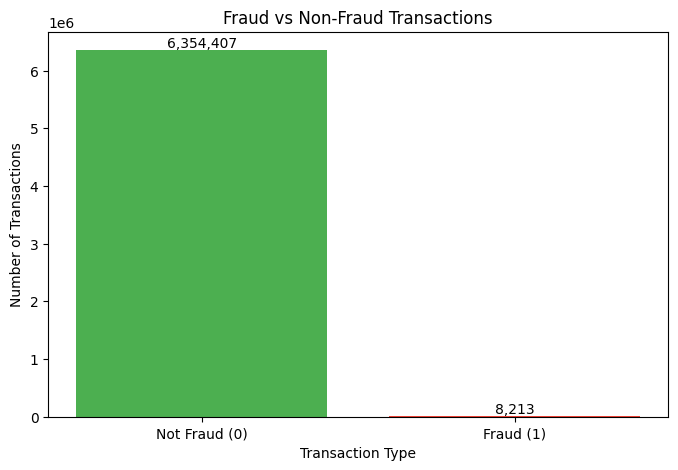

In [5]:
import matplotlib.pyplot as plt

# Fraud counts
labels = ['Not Fraud (0)', 'Fraud (1)']
values = [6354407, 8213]
colors = ['#4CAF50', '#F44336']  # Green & Red

plt.figure(figsize=(8,5))
plt.bar(labels, values, color=colors)

plt.title("Fraud vs Non-Fraud Transactions")
plt.ylabel("Number of Transactions")
plt.xlabel("Transaction Type")

# Add value labels
for i, v in enumerate(values):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom')

plt.show()


In [6]:
print(df['isFlaggedFraud'].value_counts())

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


In [7]:
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.shape

(6362620, 11)

In [9]:
df.head()
# append engineered features
df['balance_diff_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balance_diff_dest'] = df['oldbalanceDest'] - df['newbalanceDest']



In [10]:
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0  M1979787155             0.0             0.0        0               0   
1  M2044282225             0.0             0.0        0               0   
2   C553264065             0.0             0.0        1               0   
3    C38997010         21182.0             0.0        1               0   
4  M1230701703             0.0             0.0        0               0   

   balance_diff_orig  balance_diff_dest  
0            9839.64                0.0  
1            1

In [11]:
print(df.columns.tolist())


['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'balance_diff_orig', 'balance_diff_dest']


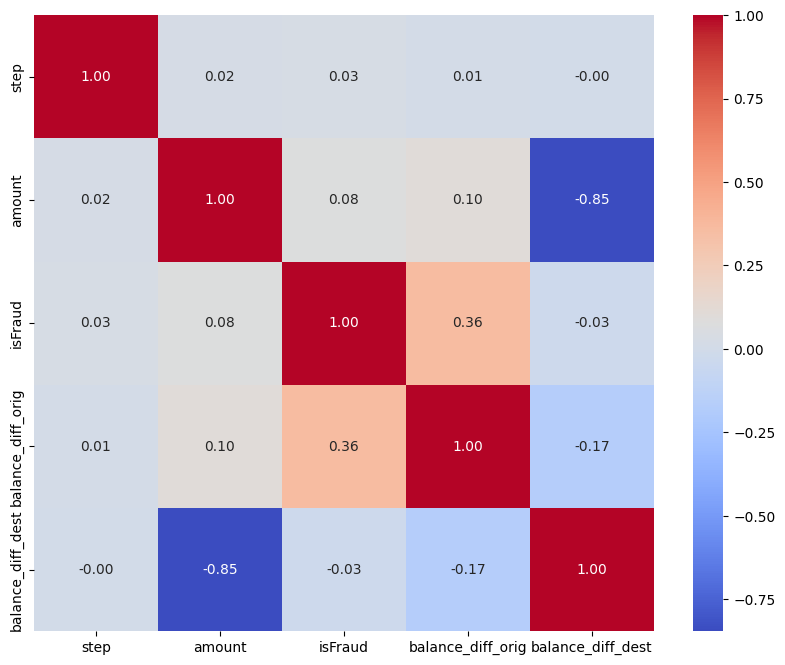

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select correct columns using a list
co = df[['step', 'type', 'amount', 'nameOrig', 
         'nameDest',  'isFraud',
         'balance_diff_orig', 'balance_diff_dest']]

# Keep only numeric columns for heatmap
co_numeric = co.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr = co_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [13]:
X = df.drop(['isFraud', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balance_diff_orig,balance_diff_dest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,9839.64,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,1864.28,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,181.00,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,181.00,21182.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,11668.14,0.0


In [14]:
X = pd.get_dummies(X, columns=['type'], drop_first=True).astype(int) # dummies = onehot encoding
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balance_diff_orig,balance_diff_dest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839,170136,160296,0,0,9839,0,0,0,1,0
1,1,1864,21249,19384,0,0,1864,0,0,0,1,0
2,1,181,181,0,0,0,181,0,0,0,0,1
3,1,181,181,0,21182,0,181,21182,1,0,0,0
4,1,11668,41554,29885,0,0,11668,0,0,0,1,0


In [15]:
Y = df['isFraud']


In [16]:
Y.head()
Y.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


In [18]:
print("Shapes -> X_train:", X_train.shape, "X_test:", X_test.shape, "y_train:", y_train.shape,"y_test:", y_train.shape)


Shapes -> X_train: (5090096, 12) X_test: (1272524, 12) y_train: (5090096,) y_test: (5090096,)


In [19]:
# 2) compute class counts and scale_pos_weight
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / max(1, pos)
print(f"Train counts -> neg: {neg}, pos: {pos}, scale_pos_weight: {scale_pos_weight:.2f}")


Train counts -> neg: 5083526, pos: 6570, scale_pos_weight: 773.75


In [81]:
# Create XGBoost model for fraud detection (with class imbalance handling)
model = XGBClassifier(

    # Number of trees (boosting rounds). More trees -> stronger model.
    n_estimators=600,

    # Learning rate (how fast the model learns). Smaller = more stable, less overfitting.
    learning_rate=0.05,

    # Maximum depth of each tree. Higher depth = more complex patterns (risk of overfitting).
    max_depth=6,

    # Randomly uses 80% of training samples for each tree to prevent overfitting.
    subsample=0.8,

    # Randomly uses 80% of the features for each tree (improves generalization).
    colsample_bytree=0.8,

    # Avoids old XGBoost warning. Not related to performance.
    #use_label_encoder=False,

    # Loss function to optimize — log loss works best for binary classification like fraud detection.
    eval_metric='logloss',

    # IMPORTANT: handles class imbalance (fraud vs non-fraud).
    # Makes fraud samples more important during training.
    scale_pos_weight=scale_pos_weight,

    # Ensures consistent results every time you run the code (random seed).
    random_state=42,

    # Use all CPU cores to train faster.
    n_jobs=-1
)

In [82]:
#fit with sample_weight
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=50
)
model.set_params(early_stopping_rounds=30)

[0]	validation_0-logloss:0.65019
[50]	validation_0-logloss:0.06723
[100]	validation_0-logloss:0.02506
[150]	validation_0-logloss:0.01859
[200]	validation_0-logloss:0.01388
[250]	validation_0-logloss:0.01074
[300]	validation_0-logloss:0.00893
[350]	validation_0-logloss:0.00754
[400]	validation_0-logloss:0.00646
[450]	validation_0-logloss:0.00569
[500]	validation_0-logloss:0.00508
[550]	validation_0-logloss:0.00457
[599]	validation_0-logloss:0.00412


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,30
,enable_categorical,False
,eval_metric,'logloss'


In [83]:
#5) eval
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0     1.0000    0.9984    0.9992   1270881
           1     0.4467    0.9890    0.6154      1643

    accuracy                         0.9984   1272524
   macro avg     0.7233    0.9937    0.8073   1272524
weighted avg     0.9993    0.9984    0.9987   1272524

ROC AUC: 0.9997935310672671
Confusion matrix:
 [[1268868    2013]
 [     18    1625]]


In [84]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Precision: 0.44667399670148433
Recall: 0.9890444309190505
F1: 0.6154137473963265
Confusion Matrix:
 [[1268868    2013]
 [     18    1625]]


In [96]:
import joblib

# assume model = xgboost model
joblib.dump(model, "xgb_model.joblib", compress=3 )


['xgb_model.joblib']

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score



In [87]:
# Create Random Forest model with class_weight for imbalance
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    class_weight='balanced',   # handles fraud imbalance
    random_state=42,
    n_jobs=-1
)



In [95]:
# Train model
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]
verbose=50



In [89]:
# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred, digits=4))

print("Random Forest ROC AUC:", roc_auc_score(y_test, rf_proba))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9995    0.9997   1270881
           1     0.7114    0.9227    0.8034      1643

    accuracy                         0.9994   1272524
   macro avg     0.8557    0.9611    0.9015   1272524
weighted avg     0.9995    0.9994    0.9995   1272524

Random Forest ROC AUC: 0.9991304051661494
Random Forest Confusion Matrix:
[[1270266     615]
 [    127    1516]]


In [90]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

threshold = 0.56   # change this later if needed

rf_pred_thresh = (rf_proba >= threshold).astype(int)

print("Precision:", precision_score(y_test, rf_pred_thresh))
print("Recall:", recall_score(y_test, rf_pred_thresh))
print("F1:", f1_score(y_test, rf_pred_thresh))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred_thresh))


Precision: 0.7842411422527763
Recall: 0.9026171637248935
F1: 0.8392756083757782
Confusion Matrix:
 [[1270473     408]
 [    160    1483]]


In [91]:
# XGBoost after threshold
xgb_prec = precision_score(y_test, y_pred)
xgb_rec  = recall_score(y_test, y_pred)
xgb_f1   = f1_score(y_test, y_pred)

# Random Forest after threshold
rf_prec = precision_score(y_test, rf_pred)
rf_rec  = recall_score(y_test, rf_pred)
rf_f1   = f1_score(y_test, rf_pred)


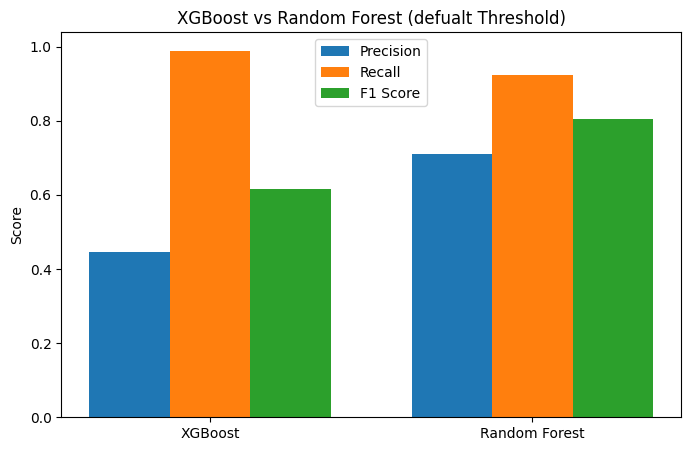

In [92]:
models = ["XGBoost", "Random Forest"]
precision = [xgb_prec, rf_prec]
recall = [xgb_rec, rf_rec]
f1 = [xgb_f1, rf_f1]

x = range(len(models))

plt.figure(figsize=(8,5))
plt.bar(x, precision, width=0.25, label="Precision")
plt.bar([p + 0.25 for p in x], recall, width=0.25, label="Recall")
plt.bar([p + 0.50 for p in x], f1, width=0.25, label="F1 Score")

plt.xticks([p + 0.25 for p in x], models)
plt.ylabel("Score")
plt.title("XGBoost vs Random Forest (defualt Threshold)")
plt.legend()
plt.show()


In [93]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balance_diff_orig,balance_diff_dest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839,170136,160296,0,0,9839,0,0,0,1,0
1,1,1864,21249,19384,0,0,1864,0,0,0,1,0
2,1,181,181,0,0,0,181,0,0,0,0,1
3,1,181,181,0,21182,0,181,21182,1,0,0,0
4,1,11668,41554,29885,0,0,11668,0,0,0,1,0


In [94]:
import joblib

# assume model = xgboost model, rf_model = random forest
import joblib

joblib.dump(rf_model, "rf_model.joblib", compress=3)

['rf_model.joblib']